In [3]:
!pip install tensorflow matplotlib


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.3777 - loss: 1.7218 - val_accuracy: 0.5724 - val_loss: 1.2312
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5926 - loss: 1.1718 - val_accuracy: 0.6344 - val_loss: 1.0566
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6463 - loss: 1.0166 - val_accuracy: 0.6395 - val_loss: 1.0565
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6849 - loss: 0.9113 - val_accuracy: 0.6726 - val_loss: 0.9529
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7050 - loss: 0.8513 - val_accuracy: 0.6808 - val_loss: 0.9270
313/313 - 4s - 12ms/step - accuracy: 0.6808 - loss: 0.9270
✅ Test Accuracy: 0.6808000206947327


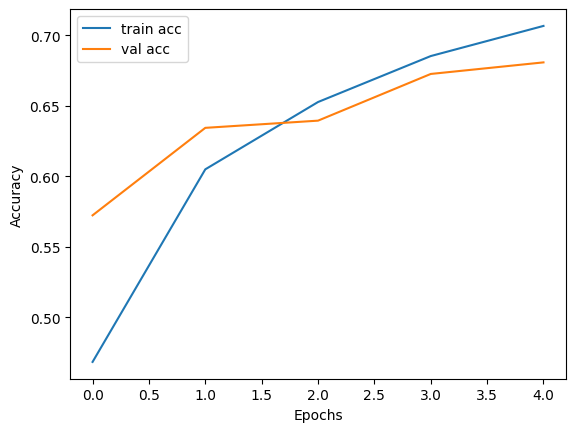

In [4]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset (60k images, 10 classes)
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("✅ Test Accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
